<a href="https://colab.research.google.com/github/LolitaOnayeva/Detecting-Mental-Health-Conditions-on-Reddit-using-NLP-and-machine-learning-/blob/main/5k_NN_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv 
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mental_health_data/full_mental_health_df.csv')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['post'] = df['post'].apply(clean_text)
df['post'] = df['post'].str.replace('\d+', '')

In [ ]:
df['post']

0         anyone else like taking long walks snows every...
1         meditation making anious couple sessions day h...
2         rant aniety meds ive self medicating benzodiaz...
3         advice friend please dated girl year moved awa...
4         feeling like im back started ive feeling lot b...
                                ...                        
152961    coteaching waste coteacher two choices help ki...
152962    challenged st year teacher arm wrestling match...
152963    pros cons elementary school teaching im confus...
152964    parentteacher conferences para honestly dont g...
152965    pearson scanning palms registering nes  eam li...
Name: post, Length: 152966, dtype: object

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 5000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['post'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 215146 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['post'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (152966, 250)


In [ ]:
X[100]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
Y = pd.get_dummies(df['subreddit']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (152966, 12)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(122372, 250) (122372, 12)
(30594, 250) (30594, 12)


In [ ]:
from keras.layers import Input, Embedding, Dense, LSTM,SpatialDropout1D,MaxPooling1D,Conv1D,Flatten,Dropout
from keras.models import Model

#LSTM 100


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(12, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

#history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          500000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1212      
Total params: 581,612
Trainable params: 581,612
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train,
                    epochs=10,
                    validation_data=(X_test, Y_test),
                    batch_size=512)

Epoch 1/10
240/240 [==============================] - 742s 3s/step - loss: 1.7483 - accuracy: 0.4271 - val_loss: 0.9358 - val_accuracy: 0.6803
Epoch 2/10
240/240 [==============================] - 733s 3s/step - loss: 0.8385 - accuracy: 0.7094 - val_loss: 0.7473 - val_accuracy: 0.7410
Epoch 3/10
240/240 [==============================] - 730s 3s/step - loss: 0.6879 - accuracy: 0.7588 - val_loss: 0.6806 - val_accuracy: 0.7575
Epoch 4/10
240/240 [==============================] - 729s 3s/step - loss: 0.6094 - accuracy: 0.7821 - val_loss: 0.6480 - val_accuracy: 0.7601
Epoch 5/10
240/240 [==============================] - 729s 3s/step - loss: 0.5820 - accuracy: 0.7849 - val_loss: 0.6929 - val_accuracy: 0.7539
Epoch 6/10
240/240 [==============================] - 728s 3s/step - loss: 0.5863 - accuracy: 0.7817 - val_loss: 0.6106 - val_accuracy: 0.7774
Epoch 7/10
240/240 [==============================] - 737s 3s/step - loss: 0.5410 - accuracy: 0.8007 - val_loss: 0.6218 - val_accuracy: 0.7776

In [ ]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
#plot_history(history)

Training Accuracy: 0.8245
Testing Accuracy:  0.7796


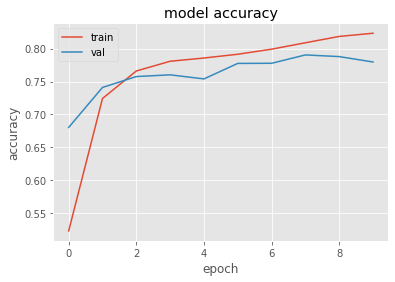

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
rounded_predictions = model.predict(X_test, batch_size=128, verbose=0)
rounded_predictions=np.argmax(rounded_predictions, axis=1)
rounded_predictions[1]
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels[1]

3

In [ ]:
labels=['anxiety','bipolarreddit','conspiracy','depression','fitness','meditation','parenting',
        'personalfinance','schizophrenia','suicide','teaching','ptsd']
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm

array([[ 3283,     2,     9,   776,    16,    19,    27,     0,    31,
           16,    41,     1],
       [   25,   149,     1,   130,     2,     2,     3,     0,    13,
           11,    11,     3],
       [   18,     0,  1230,   127,    17,    10,    34,    13,     0,
           14,    19,     2],
       [  317,    24,    28, 10294,    30,    11,    60,     5,    21,
           28,   845,     6],
       [   19,     1,    20,   110,  3245,     5,    18,     4,     0,
            0,     6,     0],
       [   24,     0,     9,    50,    11,   876,     3,     2,     1,
            1,     2,     5],
       [   12,     2,    16,    82,    13,     0,  1758,    10,     3,
            0,     5,     6],
       [    1,     0,     6,     9,     2,     0,    13,   260,     1,
            0,     3,     1],
       [   43,     4,     5,    82,     0,     1,     5,     0,   241,
            7,    15,     0],
       [   27,     9,    10,   142,     2,     4,     5,     1,     6,
          253,    16

#CNN


In [ ]:
model2 = Sequential()
model2.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model2.add(SpatialDropout1D(0.2))
model2.add(Conv1D(6, 3, padding='same', activation='relu'))
model2.add(MaxPooling1D())
model2.add(Flatten())
model2.add(Dense(250, activation='relu'))
model2.add(Dense(12, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 100)          500000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 250, 100)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 250, 6)            1806      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 125, 6)            0         
_________________________________________________________________
flatten (Flatten)            (None, 750)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               187750    
_________________________________________________________________
dense_3 (Dense)              (None, 12)               

In [ ]:
history = model2.fit(X_train, Y_train,
                    epochs=10,
                    validation_data=(X_test, Y_test),
                    batch_size=512)

Epoch 1/10
240/240 [==============================] - 78s 316ms/step - loss: 1.6933 - accuracy: 0.4333 - val_loss: 0.9842 - val_accuracy: 0.6550
Epoch 2/10
240/240 [==============================] - 75s 313ms/step - loss: 0.8614 - accuracy: 0.6994 - val_loss: 0.7524 - val_accuracy: 0.7340
Epoch 3/10
240/240 [==============================] - 75s 314ms/step - loss: 0.6768 - accuracy: 0.7605 - val_loss: 0.7075 - val_accuracy: 0.7482
Epoch 4/10
240/240 [==============================] - 75s 314ms/step - loss: 0.6080 - accuracy: 0.7797 - val_loss: 0.7341 - val_accuracy: 0.7255
Epoch 5/10
240/240 [==============================] - 76s 316ms/step - loss: 0.5684 - accuracy: 0.7897 - val_loss: 0.6728 - val_accuracy: 0.7572
Epoch 6/10
240/240 [==============================] - 76s 317ms/step - loss: 0.5089 - accuracy: 0.8109 - val_loss: 0.6704 - val_accuracy: 0.7618
Epoch 7/10
240/240 [==============================] - 76s 317ms/step - loss: 0.4812 - accuracy: 0.8204 - val_loss: 0.7101 - val_ac

In [ ]:
loss, accuracy = model2.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8277
Testing Accuracy:  0.7250


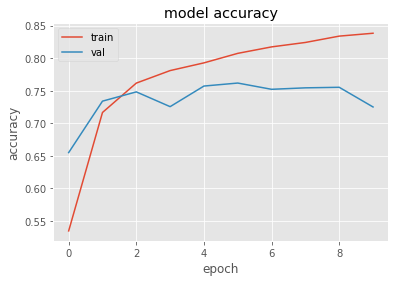

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
rounded_predictions2 = model2.predict(X_test, batch_size=128, verbose=0)
rounded_predictions2=np.argmax(rounded_predictions2, axis=1)
rounded_predictions2[1]
rounded_labels2=np.argmax(Y_test, axis=1)
rounded_labels2[1]

3

In [ ]:
labels=['anxiety','bipolarreddit','conspiracy','depression','fitness','meditation','parenting',
        'personalfinance','schizophrenia','suicide','teaching','ptsd']
cm2 = confusion_matrix(rounded_labels2, rounded_predictions2)
cm2

array([[3770,    2,   16,  272,   28,   41,   19,    1,   28,   14,   26,
           4],
       [ 109,   88,    2,   72,    7,    1,    1,    1,    1,   41,   26,
           1],
       [  95,    0, 1164,   50,   23,   28,   55,   20,    0,    8,   27,
          14],
       [1961,   35,   70, 7883,   65,   47,   93,    3,   44,   43, 1419,
           6],
       [  63,    0,   16,   40, 3256,    9,   27,    7,    0,    5,    2,
           3],
       [  79,    1,   21,   12,   11,  844,    3,    1,    1,    2,    1,
           8],
       [  41,    1,   33,   42,   21,    0, 1714,   15,   11,    1,    5,
          23],
       [  10,    0,   11,    4,    6,    1,   18,  235,    0,    5,    2,
           4],
       [ 126,    0,    1,   31,    4,    1,   14,    0,  206,    2,   16,
           2],
       [ 149,   16,   11,   39,    7,    7,    4,    1,    4,  202,   33,
           3],
       [ 401,    5,   46, 1920,    8,    1,   30,    4,   22,   26, 2624,
           1],
       [  28,    0,  

#LSTM+CNN

In [ ]:
model3 = Sequential()
model3.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model3.add(SpatialDropout1D(0.2))
model3.add(Conv1D(filters=6, kernel_size=3, padding='same', activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(LSTM(100))
model3.add(Dense(12, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 100)          500000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 250, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 250, 6)            1806      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 125, 6)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               42800     
_________________________________________________________________
dense_4 (Dense)              (None, 12)                1212      
Total params: 545,818
Trainable params: 545,818
Non-trainable params: 0
________________________________________________

In [ ]:
history = model3.fit(X_train, Y_train,
                    epochs=10,
                    validation_data=(X_test, Y_test),
                    batch_size=512)

Epoch 1/10
240/240 [==============================] - 229s 943ms/step - loss: 1.8021 - accuracy: 0.4195 - val_loss: 1.1875 - val_accuracy: 0.5388
Epoch 2/10
240/240 [==============================] - 227s 944ms/step - loss: 1.0553 - accuracy: 0.6073 - val_loss: 0.9740 - val_accuracy: 0.6485
Epoch 3/10
240/240 [==============================] - 226s 942ms/step - loss: 0.8888 - accuracy: 0.6776 - val_loss: 0.8826 - val_accuracy: 0.6853
Epoch 4/10
240/240 [==============================] - 226s 942ms/step - loss: 0.7998 - accuracy: 0.7168 - val_loss: 0.8940 - val_accuracy: 0.6500
Epoch 5/10
240/240 [==============================] - 226s 944ms/step - loss: 0.7611 - accuracy: 0.7243 - val_loss: 0.7538 - val_accuracy: 0.7273
Epoch 6/10
240/240 [==============================] - 226s 942ms/step - loss: 0.6802 - accuracy: 0.7551 - val_loss: 0.7039 - val_accuracy: 0.7457
Epoch 7/10
240/240 [==============================] - 226s 943ms/step - loss: 0.6242 - accuracy: 0.7708 - val_loss: 0.6834 -

In [ ]:
loss, accuracy = model3.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8124
Testing Accuracy:  0.7670


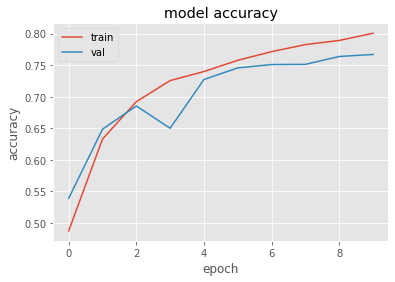

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
rounded_predictions3 = model3.predict(X_test, batch_size=128, verbose=0)
rounded_predictions3=np.argmax(rounded_predictions3, axis=1)
rounded_predictions3[1]
rounded_labels3=np.argmax(Y_test, axis=1)
rounded_labels3[1]

3

In [ ]:
labels=['anxiety','bipolarreddit','conspiracy','depression','fitness','meditation','parenting',
        'personalfinance','schizophrenia','suicide','teaching','ptsd']
cm3 = confusion_matrix(rounded_labels3, rounded_predictions3)
cm3

array([[3359,    1,   10,  730,   21,   33,   12,    0,   15,    8,   32,
           0],
       [  61,   38,    4,  140,    1,    2,    8,    1,   24,   60,   11,
           0],
       [  13,    0, 1182,  114,   47,   24,   36,   17,    1,    8,   28,
          14],
       [ 354,   16,   30, 9928,   56,   18,   41,    3,   21,   16, 1183,
           3],
       [  10,    0,   34,   99, 3274,    5,    3,    0,    0,    1,    1,
           1],
       [  25,    0,   19,   47,   30,  849,    0,    0,    0,    2,    3,
           9],
       [  25,   13,   26,  129,   17,    1, 1589,   13,    3,   52,    2,
          37],
       [   1,    0,   32,   17,    1,    0,   49,  193,    0,    0,    0,
           3],
       [  68,    6,    3,   75,    1,    2,    2,    0,  214,   23,    8,
           1],
       [  70,   10,    6,  128,    4,    7,   14,    0,  126,   95,   14,
           2],
       [  62,    0,   24, 2389,    9,    0,    8,    0,    8,    5, 2583,
           0],
       [   7,    1,  